# Promotion A-B Testing and further analysis

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
from pathlib import Path
processed_data_path = Path("data/cleaned_WA_Marketing-Campaign.csv")

In [5]:
df = pd.read_csv(processed_data_path)

### Showing basic Descriptive Statistics

In [11]:
print("Dataset contains {} rows and {} colums". format(df.shape[0], df.shape[1]))

Dataset contains 548 rows and 11 colums


In [13]:
print("Data Summary:\n", df.describe())

Data Summary:
          MarketID  LocationID  AgeOfStore   Promotion        week  \
count  548.000000  548.000000  548.000000  548.000000  548.000000   
mean     5.715328  479.656934    8.503650    2.029197    2.500000   
std      2.877001  287.973679    6.638345    0.810729    1.119055   
min      1.000000    1.000000    1.000000    1.000000    1.000000   
25%      3.000000  216.000000    4.000000    1.000000    1.750000   
50%      6.000000  504.000000    7.000000    2.000000    2.500000   
75%      8.000000  708.000000   12.000000    3.000000    3.250000   
max     10.000000  920.000000   28.000000    3.000000    4.000000   

       SalesInThousands  TotalSales_4Weeks  AvgWeeklySales  marketSizeEncoded  \
count        548.000000         548.000000      548.000000         548.000000   
mean          53.466204         213.864818       53.466204           2.197080   
std           16.755216          64.600216       16.150054           0.614742   
min           17.340000         111.360

In [15]:
print("Sample data:\n", df.head())

Sample data:
    MarketID MarketSize  LocationID  AgeOfStore  Promotion  week  \
0         1     Medium           1           4          3     1   
1         1     Medium           1           4          3     2   
2         1     Medium           1           4          3     3   
3         1     Medium           1           4          3     4   
4         1     Medium           2           5          2     1   

   SalesInThousands  TotalSales_4Weeks  AvgWeeklySales  marketSizeEncoded  \
0             33.73             137.68          34.420                  2   
1             35.67             137.68          34.420                  2   
2             29.03             137.68          34.420                  2   
3             39.25             137.68          34.420                  2   
4             27.81             118.18          29.545                  2   

   HighPerformer  
0              0  
1              0  
2              0  
3              0  
4              0  


### Changing columns: Promotion, HighPerformer, Location ID, MarketID and week into categorical variables

In [18]:
print("Changing columns : Promotion, HighPerformer, LocationID, MarketID and week into categorical varibales \n")
df['Promotion'] = df['Promotion'].astype('category')
df['HighPerformer'] = df['HighPerformer'].astype('category')
df['LocationID'] = df['LocationID'].astype('category')
df['MarketID'] = df['MarketID'].astype('category')
df['week'] = df['week'].astype('category')

Changing columns : Promotion, HighPerformer, LocationID, MarketID and week into categorical varibales 



In [20]:
print(df.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   MarketID           548 non-null    category
 1   MarketSize         548 non-null    object  
 2   LocationID         548 non-null    category
 3   AgeOfStore         548 non-null    int64   
 4   Promotion          548 non-null    category
 5   week               548 non-null    category
 6   SalesInThousands   548 non-null    float64 
 7   TotalSales_4Weeks  548 non-null    float64 
 8   AvgWeeklySales     548 non-null    float64 
 9   marketSizeEncoded  548 non-null    int64   
 10  HighPerformer      548 non-null    category
dtypes: category(5), float64(3), int64(2), object(1)
memory usage: 35.0+ KB
None 



### Descriptive Statistics: Grouping by Promotion

In [23]:
print("Descriptive Statistics: Grouping by Promotion... \n")
sales_summary = df.groupby('Promotion')['SalesInThousands'].agg(['mean', 'std', 'count'])

print(sales_summary)

Descriptive Statistics: Grouping by Promotion... 

                mean        std  count
Promotion                             
1          58.099012  16.553782    172
2          47.329415  15.108955    188
3          55.364468  16.766231    188


C:\Users\lsmith3\AppData\Local\Temp\ipykernel_38276\4178258523.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_summary = df.groupby('Promotion')['SalesInThousands'].agg(['mean', 'std', 'count'])


### One-Way Anova to test if there is a significant difference in sales across promotions")

In [26]:
print("One-Way Anova to test if there is a significant difference in sales across promotions")
print("ANOVA results ...\n")

anova_result = stats.f_oneway(
    df[df['Promotion'] == 1]['SalesInThousands'],
    df[df['Promotion'] == 2]['SalesInThousands'],
    df[df['Promotion'] == 3]['SalesInThousands']
)

print("F-statistic: {},  p-value: {} \n".format(anova_result.statistic, anova_result.pvalue))

One-Way Anova to test if there is a significant difference in sales across promotions
ANOVA results ...

F-statistic: 21.953485793080677,  p-value: 6.765849261408714e-10 



### Interpretation of ANOVA results

In [29]:
print("Interpretation\n")

if anova_result.pvalue < 0.05:
    print("There is a statistically significant difference in sales across promotions. ")
else:
    print("There is no statistically significant difference in sales across promotions. ")

Interpretation

There is a statistically significant difference in sales across promotions. 


### Visualizing sales by promotion

Visualizing sales by promotion... 


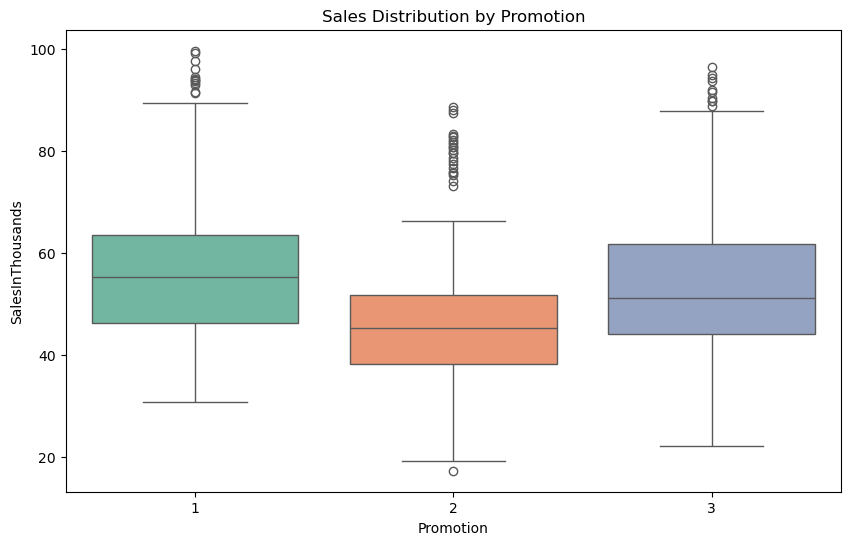

In [32]:
print("Visualizing sales by promotion... ")
plt.figure(figsize=(10,6))
sns.boxplot(df, x='Promotion', y='SalesInThousands', hue='Promotion', palette='Set2', legend=False)
plt.title('Sales Distribution by Promotion')
plt.xlabel('Promotion')
plt.ylabel('SalesInThousands')
plt.show()

### Calculating uplift for each promotion (compared to Control Group)

Promotion 1 is being used as the Control Group

C:\Users\lsmith3\AppData\Local\Temp\ipykernel_38276\4263729725.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df, x='Promotion', y='Uplift', palette='Set1')


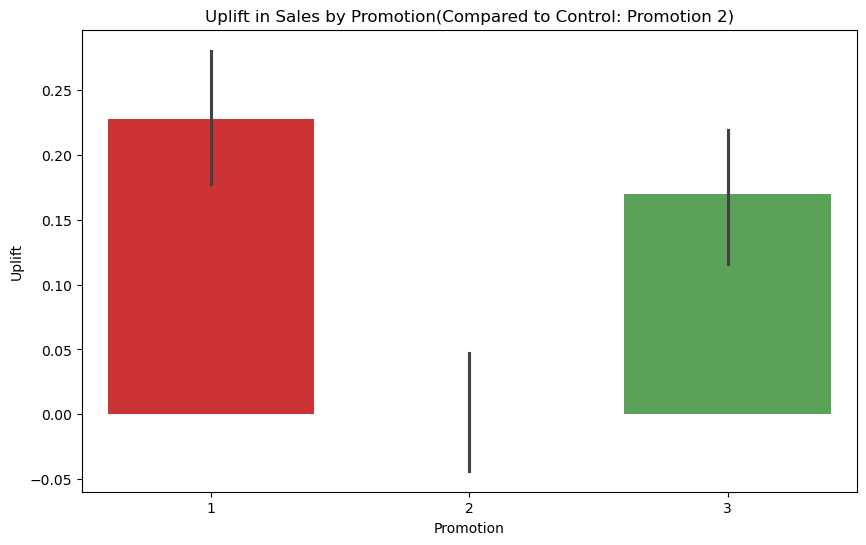

In [35]:
control_mean = df[df['Promotion']== 2]['SalesInThousands'].mean()
#Percentage Uplift
df['Uplift'] = (df['SalesInThousands'] - control_mean) / control_mean

plt.figure(figsize=(10,6))
sns.barplot(df, x='Promotion', y='Uplift', palette='Set1')
plt.title('Uplift in Sales by Promotion(Compared to Control: Promotion 2)')
plt.xlabel('Promotion')
plt.ylabel('Uplift')
plt.show()

Promotion 2 (Baseline): Since Promotion 2 is the baseline, its uplift is considered 0%.

Promotion 1: The uplift for Promotion 1 is positive, ranging from 0% to 23%, with a vertical line indicating the 95% confidence interval (from 17% to 29%). This suggests that Promotion 1 outperformed Promotion 2, with a notable positive impact on sales, indicating it was significantly more effective than Promotion 2.

Promotion 3: Promotion 3 also shows a positive uplift ranging from 0% to 17%, with a vertical line indicating the 95% confidence interval (from 12% to 23%). This suggests that Promotion 3 also performed better than Promotion 2, though not as strongly as Promotion 1.

## Additional Analysis and Visualizations

#### Sales over the 4 week period for top 5 locations.

C:\Users\lsmith3\AppData\Local\Temp\ipykernel_38276\2873035387.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_locations = df.groupby('LocationID')['SalesInThousands'].sum().nlargest(5).index


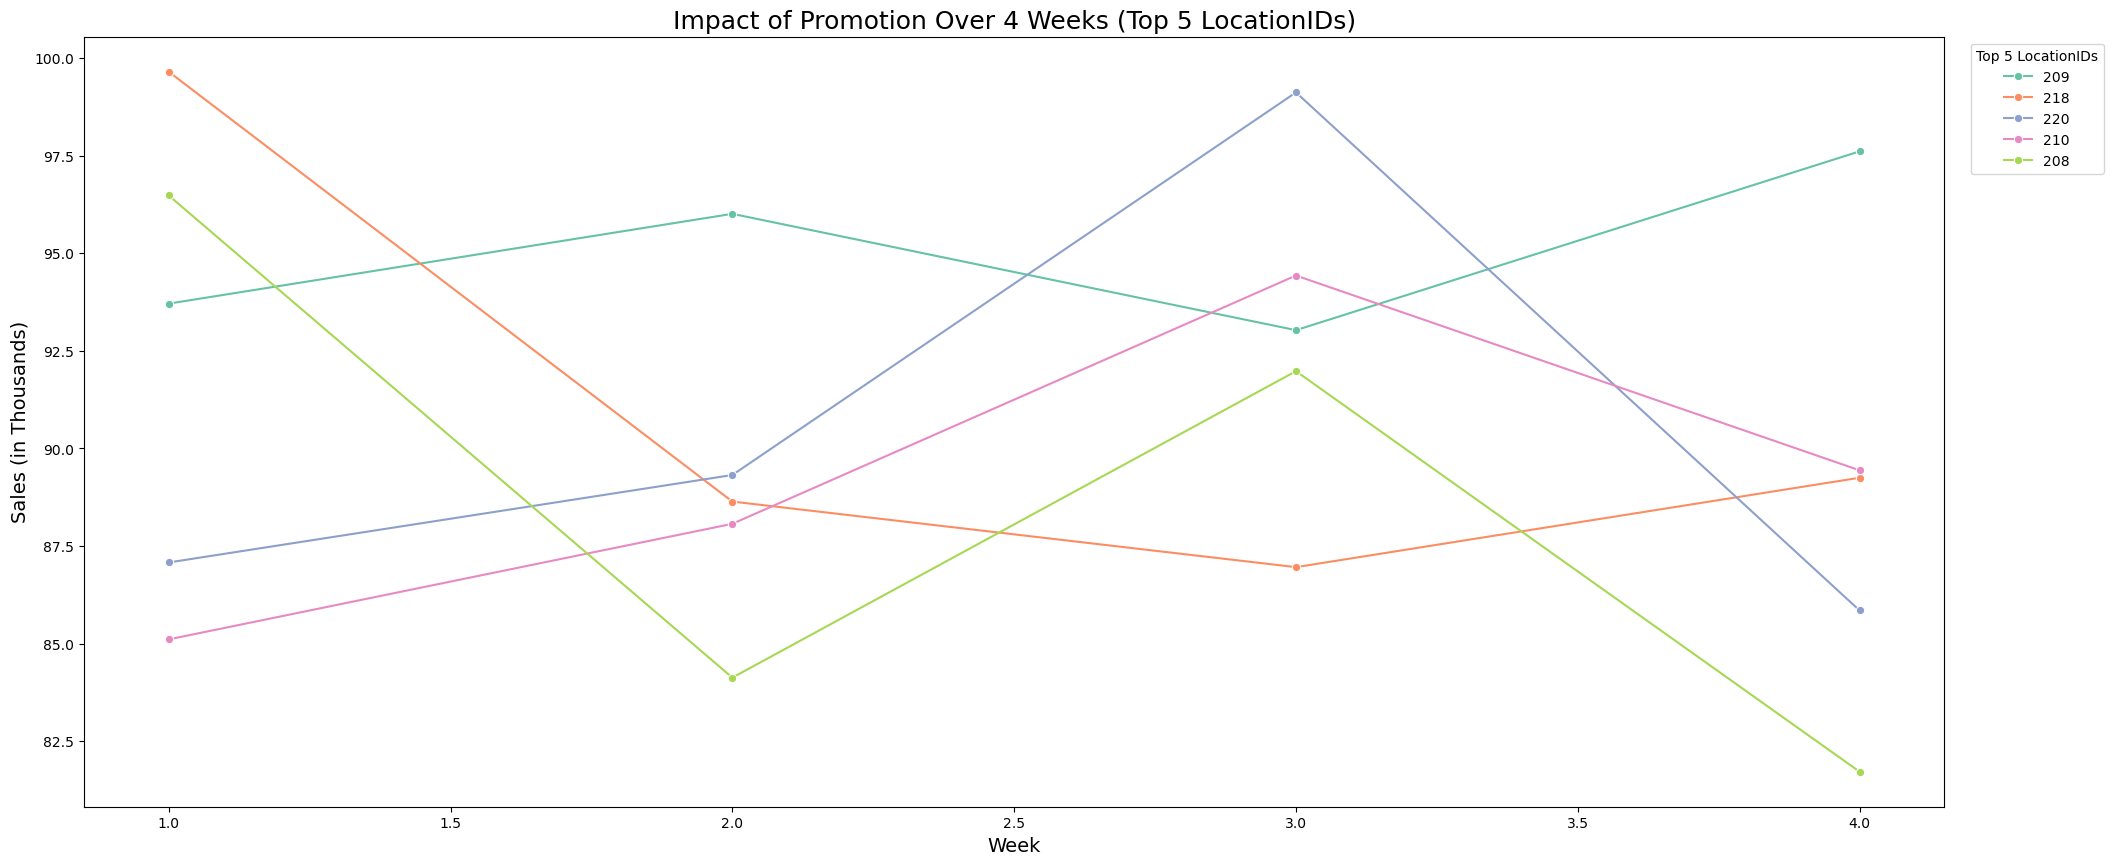

In [40]:
top_locations = df.groupby('LocationID')['SalesInThousands'].sum().nlargest(5).index

df_filtered = df[df['LocationID'].isin(top_locations)]
colors = sns.color_palette("Set2", n_colors=5)

plt.figure(figsize=(24, 10))
for idx, location in enumerate(top_locations):
    location_data = df_filtered[df_filtered['LocationID'] == location]
    sns.lineplot(data=location_data, x='week', y='SalesInThousands', 
                 label=location, color=colors[idx], marker='o')
plt.title('Impact of Promotion Over 4 Weeks (Top 5 LocationIDs)', fontsize=18)
plt.xlabel('Week', fontsize=14)
plt.ylabel('Sales (in Thousands)', fontsize=14)

plt.legend(title='Top 5 LocationIDs', bbox_to_anchor=(1.05, 1), loc='upper center')
plt.show()


#### Older vs Younger Store Promotion Performance Over 4 Weeks.

In [43]:
median_age = df['AgeOfStore'].median()
df['StoreCategory'] = df['AgeOfStore'].apply(lambda x: 'Older' if x >= median_age else 'Younger')

C:\Users\lsmith3\AppData\Local\Temp\ipykernel_38276\998743366.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='week', y='SalesInThousands', hue='StoreCategory', style='Promotion', markers=True, ci=None)


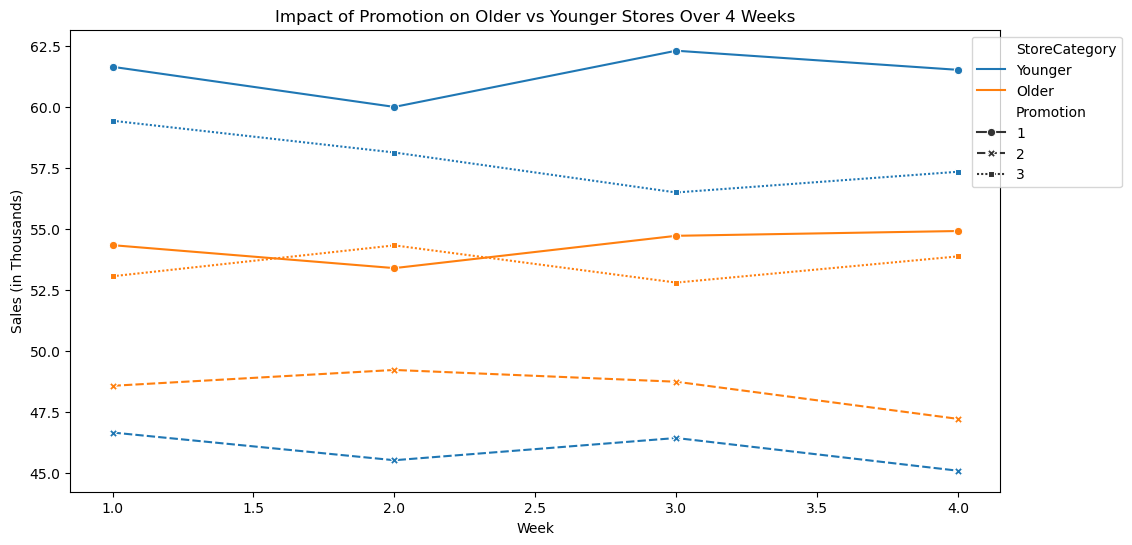

In [45]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='week', y='SalesInThousands', hue='StoreCategory', style='Promotion', markers=True, ci=None)
plt.title('Impact of Promotion on Older vs Younger Stores Over 4 Weeks')
plt.xlabel('Week')
plt.ylabel('Sales (in Thousands)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper center')
plt.show()

#### Promotion Effect by Market Size

In [48]:
promo_by_market_size = df.groupby(['MarketSize', 'Promotion'])['SalesInThousands'].mean().reset_index()

C:\Users\lsmith3\AppData\Local\Temp\ipykernel_38276\4029730006.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promo_by_market_size = df.groupby(['MarketSize', 'Promotion'])['SalesInThousands'].mean().reset_index()


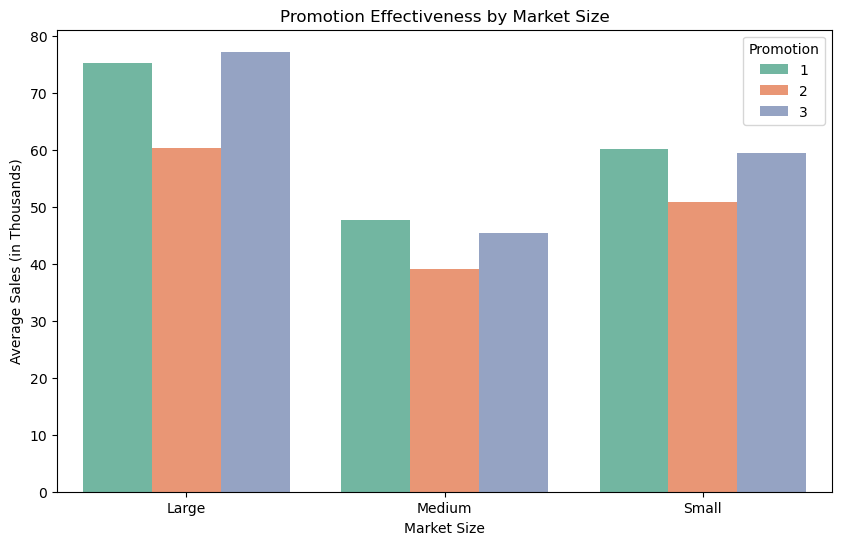

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(data=promo_by_market_size, x='MarketSize', y='SalesInThousands', hue='Promotion', palette='Set2')
plt.title('Promotion Effectiveness by Market Size')
plt.xlabel('Market Size')
plt.ylabel('Average Sales (in Thousands)')
plt.show()

#### Predicting Sales with Generalized Linear Regression

In [53]:
formula = 'SalesInThousands ~ C(Promotion) + C(MarketSize) + AgeOfStore + marketSizeEncoded'
model = smf.glm(formula=formula, data=df, family=sm.families.Gaussian()).fit()

print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       SalesInThousands   No. Observations:                  548
Model:                            GLM   Df Residuals:                      542
Model Family:                Gaussian   Df Model:                            5
Link Function:               Identity   Scale:                          118.44
Method:                          IRLS   Log-Likelihood:                -2082.7
Date:                Tue, 08 Apr 2025   Deviance:                       64194.
Time:                        15:13:46   Pearson chi2:                 6.42e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7477
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

The Generalized Linear Model (GLM) results show the following insights:

- The intercept value indicates that, for the baseline categories, sales start at approximately 18.65 thousand units.
- **Promotion 2** (compared to Promotion 1) has a significant negative effect on sales, with a decrease of around 10.75 thousand units.
- **Promotion 3** does not have a statistically significant impact on sales, with a p-value of 0.351.
- **MarketSize**: Being in a medium-sized market significantly decreases sales by about 8.18 thousand units, while being in a small market significantly increases sales by approximately 22.84 thousand units.
- **Age of Store** has no significant impact on sales (p-value = 0.320), suggesting store age doesn't affect sales in this model.
- **marketSizeEncoded**: A one-unit increase in this encoded market size feature is associated with a significant sales increase of 18.45 thousand units.

Overall, the model explains 74.77% of the variance in sales based on these variables.